# HS-blast, megablast and CLAST comparsion


The code can be found at https://github.com/chenying2016/queries, at the time of calculating the performance the current version is "hs-blastn-0.0.4+-src" (March 7th 2016)

## Initialise the libs

In [152]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

## Load the results

In [153]:
hs_blastn_index = pa.read_csv("hsblastn/hsIndex.csv")
hsPivot = pa.read_csv('hsblastn/hsIndexPivot.csv')
hsThread1 = pa.read_csv('hsblastn/hsblastnThread1.csv')
hsThread2 = pa.read_csv('hsblastn/hsblastnThread2.csv')
hsThread3 = pa.read_csv('hsblastn/hsblastnThread3.csv')
hsThread4 = pa.read_csv('hsblastn/hsblastnThread4.csv')

## Data exploration / example

In [154]:
# Plot inside the notebook
%matplotlib inline
hs_blastn_index.head()

,Sequence,Nucleotide number,Packing db,BWT,Fasta table,SA,Total,NCBI,MB seq size,id
0,"Canarypox virus, complete genome",359853,0.002963,0.174373,1.283210,0.070890,3.685100,NC_005309.1,0.3651,0
1,"Canarypox virus, complete genome",359853,0.008976,0.230844,1.268486,0.284158,3.504893,NC_005309.1,0.3651,0
2,"Canarypox virus, complete genome",359853,0.004518,0.175551,1.291483,0.100373,3.276412,NC_005309.1,0.3651,0
3,"Canarypox virus, complete genome",359853,0.007369,0.203736,1.286997,0.143967,3.359456,NC_005309.1,0.3651,0
4,"Canarypox virus, complete genome",359853,0.003062,0.173673,1.282894,0.114630,3.521501,NC_005309.1,0.3651,0


In [155]:
print (hs_blastn_index.columns)
print (hsThread2.columns)

Index(['Sequence', 'Nucleotide number', 'Packing db', 'BWT', 'Fasta table',
       'SA', 'Total', 'NCBI', 'MB seq size', 'id'],
      dtype='object')
Index(['preprocessing time', 'sequence', 'query length', 'query numeration',
       'query time'],
      dtype='object')


## Create mean from multiple results

In [156]:
meansIndex = hs_blastn_index.groupby(['Sequence']).mean().reset_index()
meanQueryThread1 = hsThread1.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread2 = hsThread2.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread3 = hsThread3.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread4 = hsThread4.groupby(['sequence','query length']).mean().reset_index()

meanQueryThread1.head()

,sequence,query length,preprocessing time,query time
0,AG1,1000,0.090,0.00190
1,AG1,10000,0.090,0.00750
2,AG1,100000,0.124,0.05088
3,AG2,1000,0.090,0.00192
4,AG2,10000,0.090,0.01432


In [157]:
# Add total time to query search
meanQueryThread1['total']=meanQueryThread1['preprocessing time']+meanQueryThread1['query time']
meanQueryThread2['total']=meanQueryThread2['preprocessing time']+meanQueryThread2['query time']
meanQueryThread3['total']=meanQueryThread3['preprocessing time']+meanQueryThread3['query time']
meanQueryThread4['total']=meanQueryThread4['preprocessing time']+meanQueryThread4['query time']

meanQueryThread1.head()

,sequence,query length,preprocessing time,query time,total
0,AG1,1000,0.090,0.00190,0.09190
1,AG1,10000,0.090,0.00750,0.09750
2,AG1,100000,0.124,0.05088,0.17488
3,AG2,1000,0.090,0.00192,0.09192
4,AG2,10000,0.090,0.01432,0.10432


# Index creation

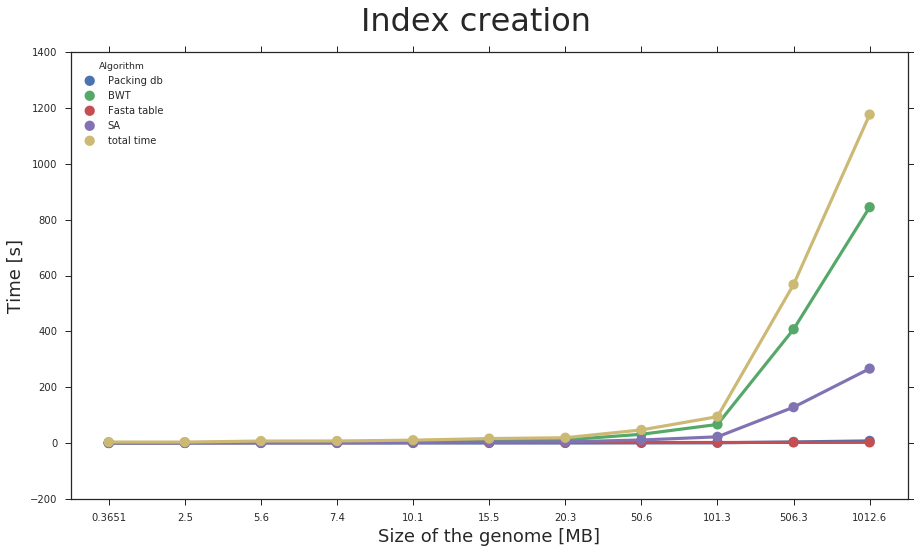

In [158]:
algorithm = hsPivot[hsPivot['Algorithm']!="size"]

sns.set(font_scale=1.2)
sns.set(style="ticks")

plt.figure(figsize=(15,8))
sns.pointplot(x="MB", y="Time", hue="Algorithm", data=algorithm,size=30, aspect=2)
plt.ylabel('Time [s]', fontsize=18)
plt.xlabel('Size of the genome [MB]', fontsize=18)
plt.suptitle("Index creation", fontsize = 32)

# Query time with multiple threads

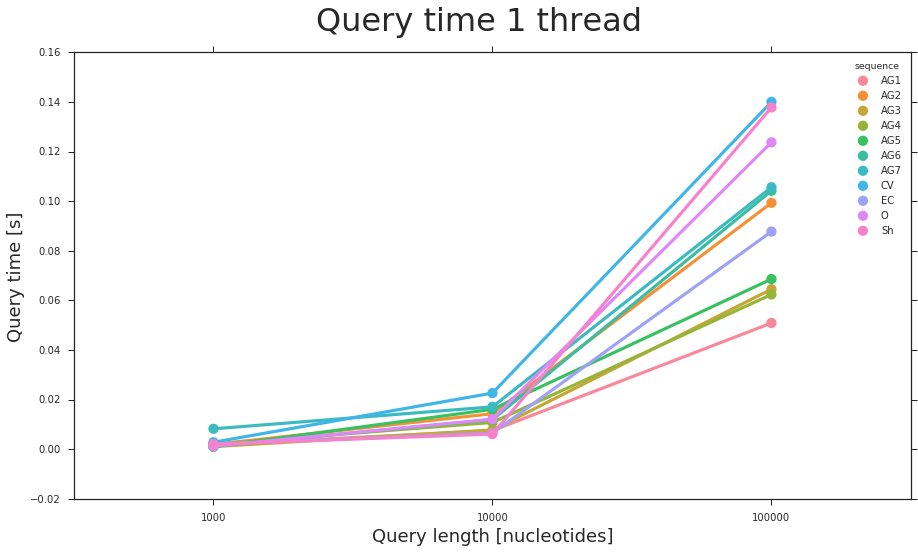

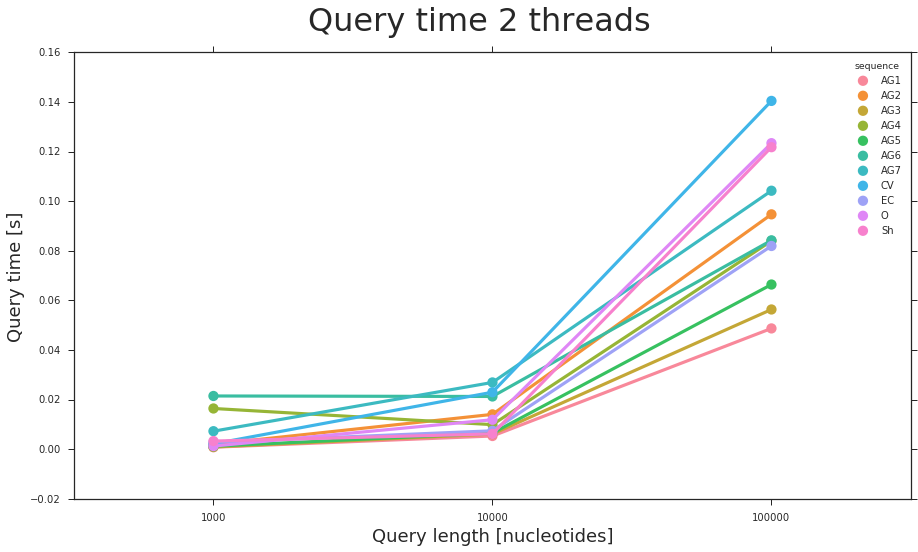

In [159]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 2 threads", fontsize = 32)

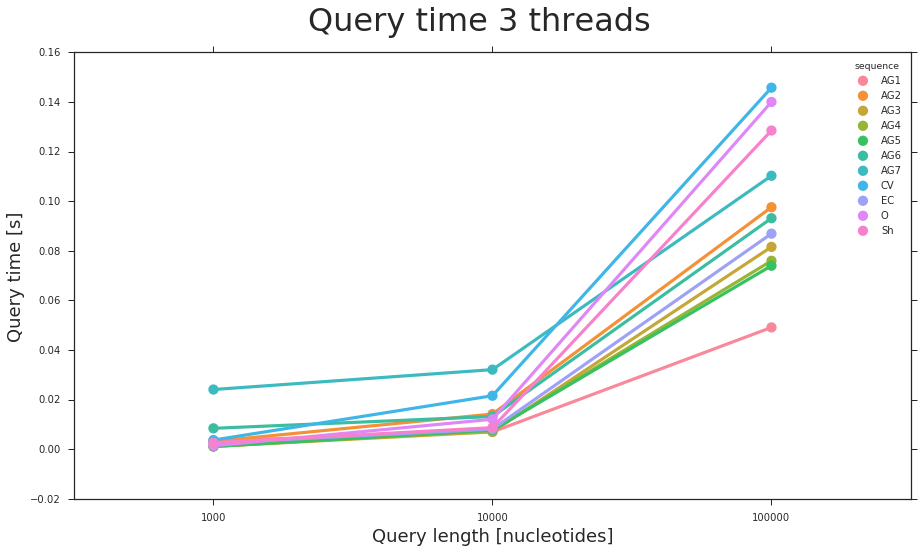

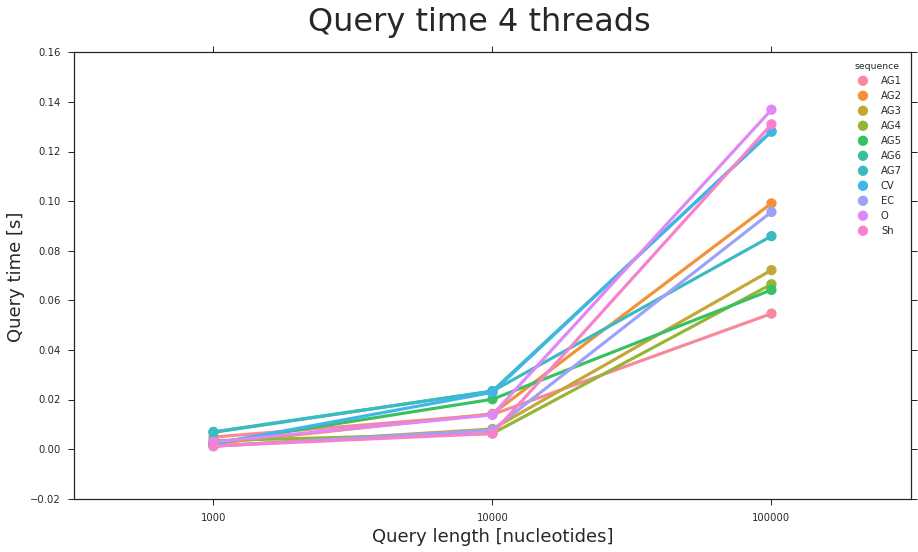

In [160]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 4 threads", fontsize = 32)

# Database loading time with multiple threads

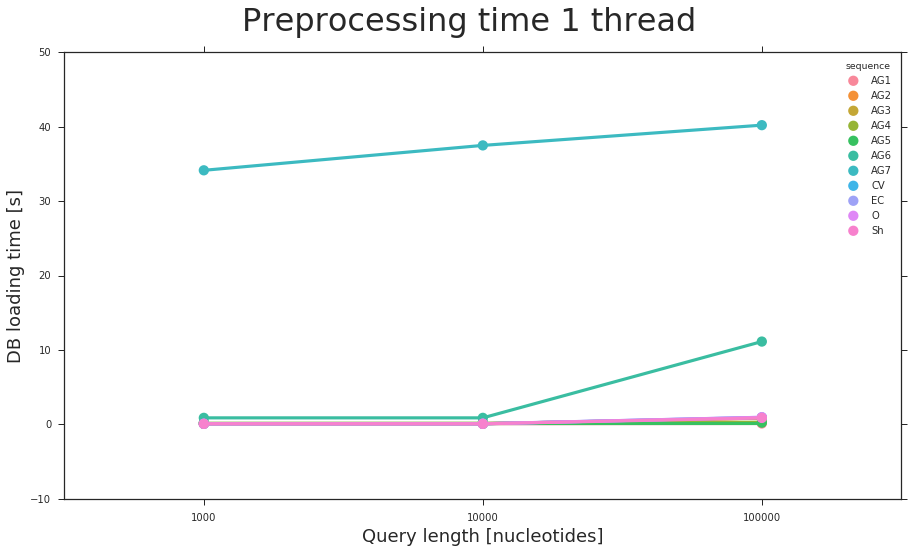

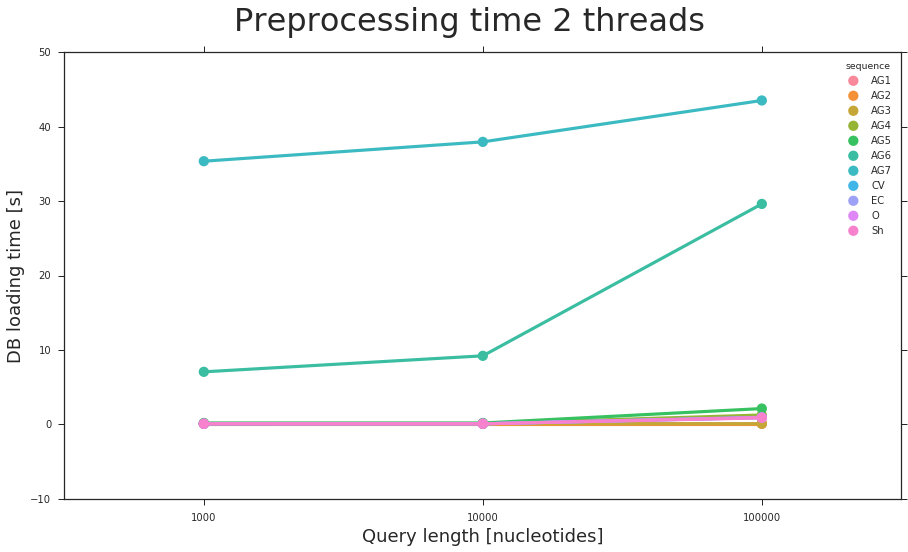

In [161]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 2 threads", fontsize = 32)

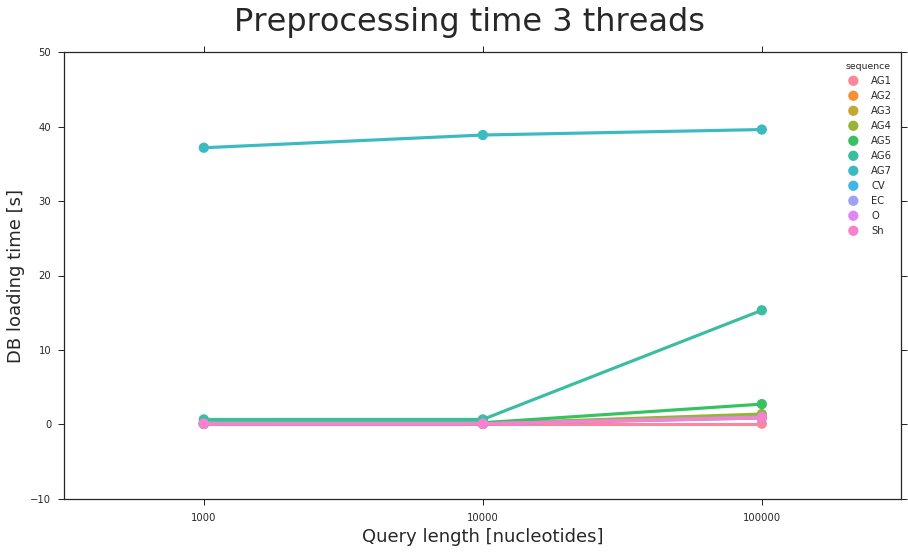

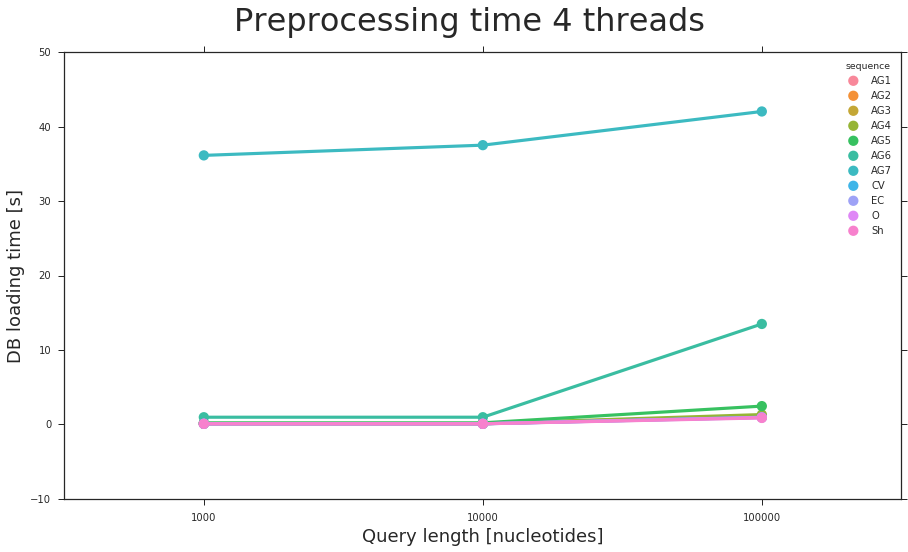

In [162]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 4 threads", fontsize = 32)

# Total time with multiple threads

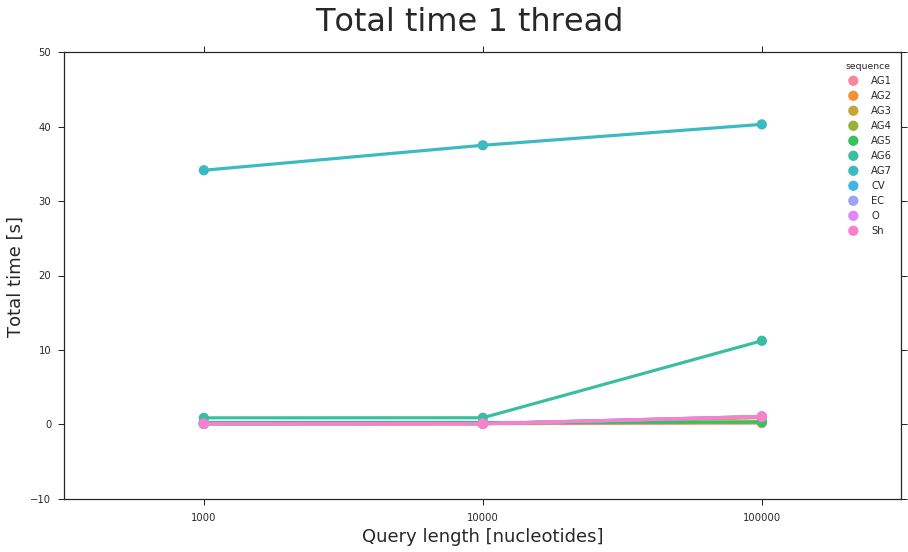

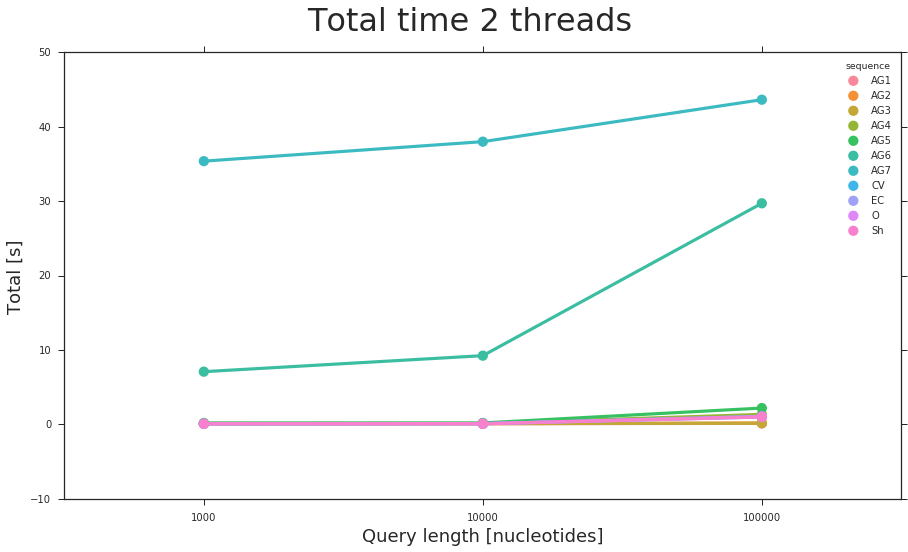

In [163]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('Total [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 2 threads", fontsize = 32)

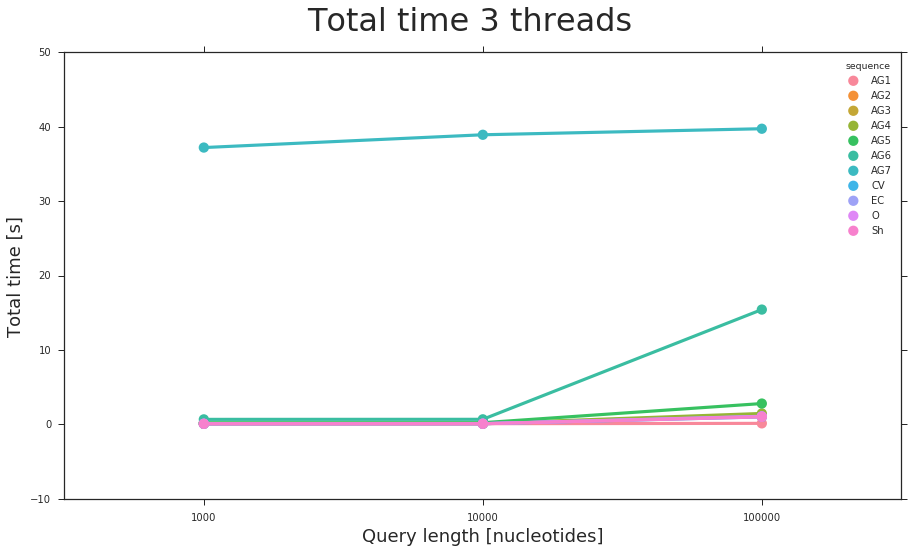

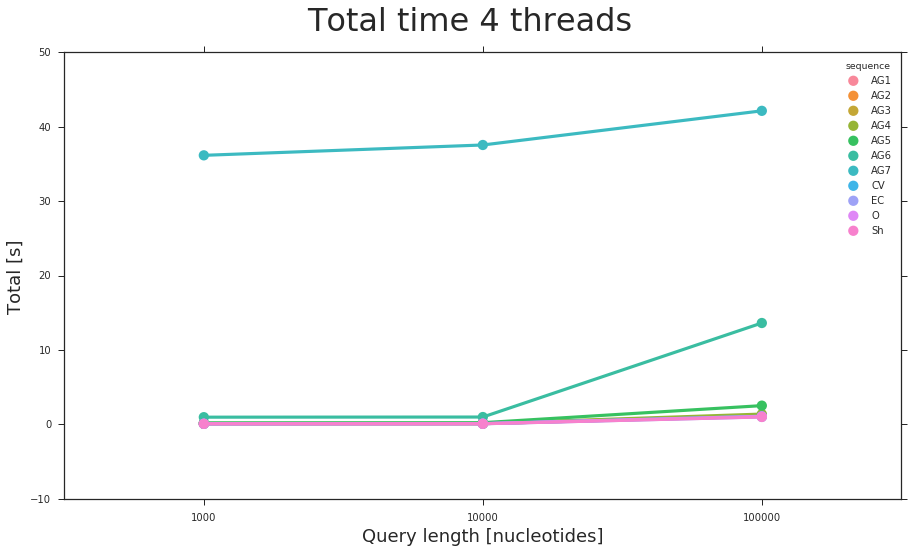

In [164]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('Total [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 4 threads", fontsize = 32)